In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import cm
import seaborn as sns

In [2]:
df1 = pd.read_csv('df1_v2.csv').set_index('date')
df2 = pd.read_csv('df2_v2.csv').set_index('date')
df3 = pd.read_csv('df3_v2.csv').set_index('date')

In [3]:
df1

,iv_pct,giv3,5_day_rets
date,,,
2011-01-04,0.337302,0.625661,0.000000
2011-01-05,0.333333,0.674603,-0.001645
2011-01-06,0.337302,0.678571,0.009341
2011-01-07,0.325397,0.652116,0.009674
2011-01-10,0.321429,0.592593,0.018271
...,...,...,...
2021-02-12,0.023810,0.828042,-0.006647
2021-02-16,0.198413,0.832011,-0.013434
2021-02-17,0.099206,0.802910,-0.012462


In [36]:
def hexbin(df, column1 = 'iv_pct', column2 = 'giv3', returns = '5_day_rets', grid_size=25, bins = None ):
    with plt.style.context("seaborn"):
        plt.figure(figsize=(10,8))
        

        plt.hexbin(x=df[column1], y=df[column2],
                   C=df[returns],
                   cmap="RdYlGn",
                   gridsize=grid_size,
                   bins = bins
                   #marginals=True
                  );          

        #plt.xlim(min(df.csi1), max(df.csi1))
        #plt.ylim(min(df.ga_csi1), max(df.ga_csi1))

        plt.colorbar()
        plt.clim(-2.5,2.5)

        plt.xlabel(column1)
        plt.ylabel(column2)
        plt.title(column1 + ' & ' + column2 + ' Contour Graph');

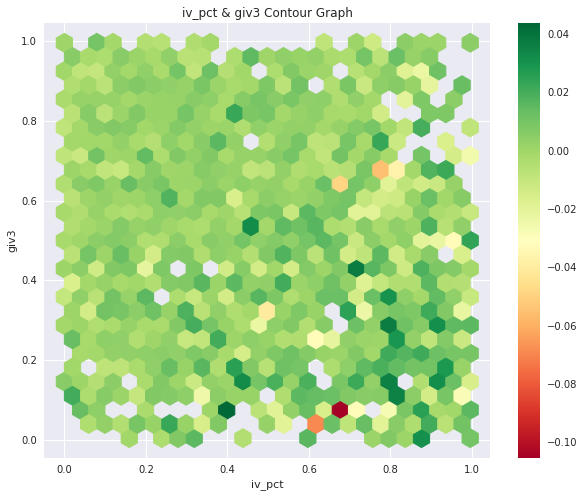

In [5]:
hexbin(df1)

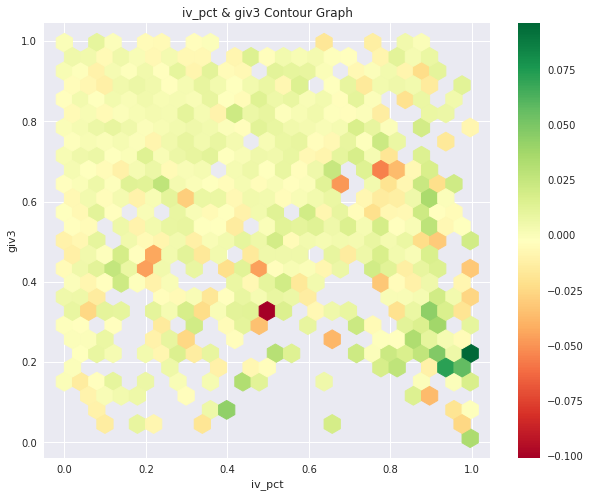

In [6]:
hexbin(df2)

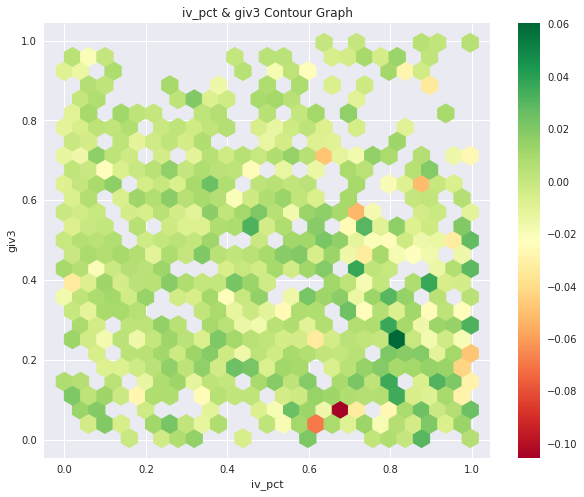

In [7]:
hexbin(df3)

In [8]:
from sklearn.linear_model import LinearRegression
from scipy.stats.stats import pearsonr
from scipy import stats

In [9]:
X = df3[['iv_pct', 'giv3']].values
y = df3['5_day_rets'].values

# Calc multiple regression and model line
lin_regression = LinearRegression().fit(X, y)
model_line = lin_regression.predict(X)

In [10]:
def get_prediction_interval(prediction, y_test, test_predictions, pi=.68):
    
    # get standard deviation of y_test
    sum_errs = np.sum((y_test - test_predictions)**2)
    
    stdev = np.sqrt(1 / (len(y_test) - 2) * sum_errs)
    
    #get interval from standard deviation
    one_minus_pi = 1 - pi
    ppf_lookup = 1 - (one_minus_pi / 2)
    z_score = stats.norm.ppf(ppf_lookup)
    interval = z_score * stdev
    #generate prediction interval lower and upper bound cs_24
    lower, upper = prediction - interval, prediction + interval
    return lower, prediction, upper

In [11]:
expected_returns = []

ivs = np.arange(.01, 1, .01)
givs = np.arange(.01, 1, .01)

for i in ivs:
    for ii in givs:
        prediction = lin_regression.predict([[i, ii]])
        lower, prediction, upper = get_prediction_interval(prediction, y, model_line, pi=.68)
        expected_returns.append([i, ii, lower[0], prediction[0], upper[0]])

In [19]:
from sklearn.preprocessing import MinMaxScaler, MaxAbsScaler, StandardScaler, RobustScaler

scaler = MinMaxScaler(feature_range=(-1,1))

In [34]:
df_test = pd.DataFrame(expected_returns, columns = ['ivp', 'giv', 'lower', '5_day_rets', 'upper'])

df_test['1-wk forecast'] = df_test['5_day_rets'] / df1['5_day_rets'].mean()

#df_test["1-wk forecast"] = scaler.fit_transform(df_test["1-wk forecast"].values.reshape(-1,1)).flatten()

df_test.head()

,ivp,giv,lower,5_day_rets,upper,1-wk forecast
0,0.01,0.01,-0.017474,0.004588,0.026651,2.422918
1,0.01,0.02,-0.017529,0.004533,0.026596,2.393883
2,0.01,0.03,-0.017584,0.004478,0.026541,2.364847
3,0.01,0.04,-0.017639,0.004423,0.026486,2.335812
4,0.01,0.05,-0.017694,0.004368,0.026431,2.306776


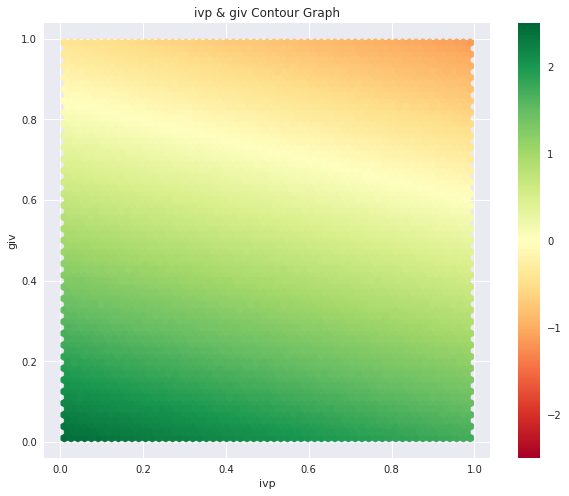

In [37]:
hexbin(df_test, 'ivp', 'giv', '1-wk forecast', grid_size = 60)

In [33]:
df_test["1-wk forecast"].mean()

0.650721506287896

In [ ]:
plt.colorbar()